# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
# Display the data table for preview
mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = len(pd.unique(mouse_study_data["Mouse ID"]))
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = pd.unique(mouse_study_data[mouse_study_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]["Mouse ID"])
duplicate_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID_data = mouse_study_data.loc[mouse_study_data["Mouse ID"] == duplicate_mouse_ID[0]]
duplicate_mouse_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study_data = mouse_study_data.drop(duplicate_mouse_ID_data.index.tolist())
cleaned_mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_number_of_mice = len(pd.unique(cleaned_mouse_study_data["Mouse ID"]))
cleaned_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
cleaned_mouse_study_data_mean = cleaned_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
cleaned_mouse_study_data_mean.name = "Mean Tumor Volume"
cleaned_mouse_study_data_median = cleaned_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
cleaned_mouse_study_data_median.name = "Median Tumor Volume"
drug_data = pd.merge(cleaned_mouse_study_data_mean,cleaned_mouse_study_data_median,on = "Drug Regimen")
cleaned_mouse_study_data_variance = cleaned_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
cleaned_mouse_study_data_variance.name = "Tumor Volume Variance"
drug_data = pd.merge(drug_data,cleaned_mouse_study_data_variance,on = "Drug Regimen")
cleaned_mouse_study_data_std = cleaned_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
cleaned_mouse_study_data_std.name = "Tumor Volume Std. Dev."
drug_data = pd.merge(drug_data,cleaned_mouse_study_data_std,on = "Drug Regimen")
cleaned_mouse_study_data_std_err = cleaned_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
cleaned_mouse_study_data_std_err.name = "Tumor Volume Std. Err."
drug_data = pd.merge(drug_data,cleaned_mouse_study_data_std_err,on = "Drug Regimen")
drug_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
adv_drug_data = cleaned_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
adv_drug_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

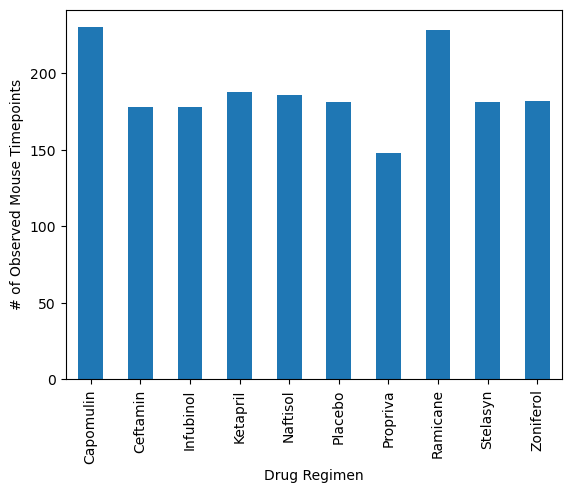

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_data = cleaned_mouse_study_data.groupby(["Drug Regimen"]).count()
count_data_plot = count_data["Mouse ID"]
count_data_plot.plot(kind = "bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

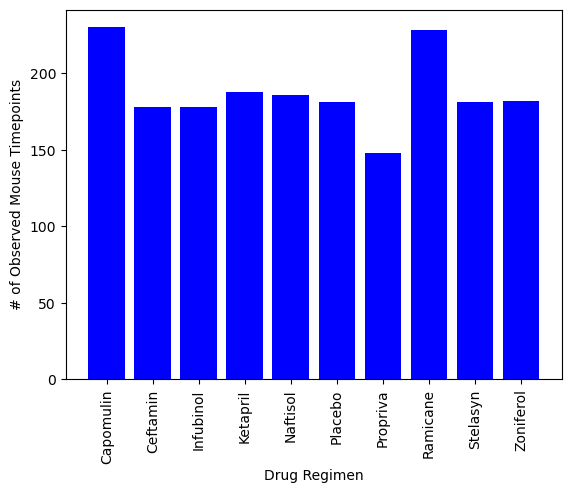

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_data = cleaned_mouse_study_data.groupby(["Drug Regimen"]).count()
x_axis = [0,1,2,3,4,5,6,7,8,9]
x_ticks = ["Capomulin", "Ceftamin", "Infubinol","Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(x_axis, count_data["Mouse ID"], color = 'b', align = "center")
plt.xticks(x_axis,x_ticks, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

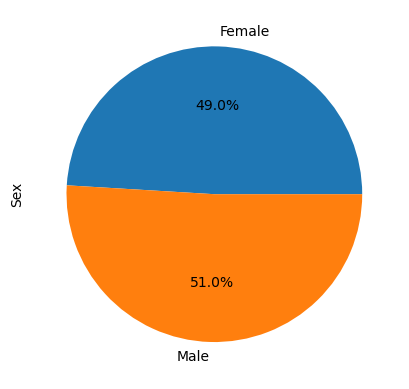

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count_data = cleaned_mouse_study_data.groupby(by = "Sex").count()
sex_count_data.plot.pie(y = "Mouse ID", autopct="%1.1f%%", ylabel = "Sex", legend = False,)
plt.show()

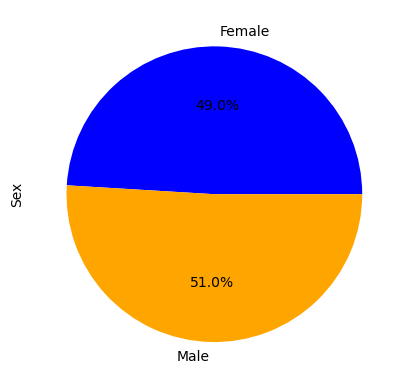

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count_data = cleaned_mouse_study_data.groupby(by = "Sex").count()
plt.pie(sex_count_data["Mouse ID"], labels = sex_count_data.index, autopct="%1.1f%%", colors = ["blue","orange"])
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
filtered_on_drug_data = cleaned_mouse_study_data.loc[(cleaned_mouse_study_data["Drug Regimen"]=="Capomulin") |
                                        (cleaned_mouse_study_data["Drug Regimen"]=="Ramicane") |
                                        (cleaned_mouse_study_data["Drug Regimen"]=="Infubinol") |
                                        (cleaned_mouse_study_data["Drug Regimen"]=="Ceftamin")]
last_timepoint_grouped_filtered_on_drug_data = filtered_on_drug_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_on_drug_time_data = pd.merge(filtered_on_drug_data, last_timepoint_grouped_filtered_on_drug_data, on = ["Mouse ID", "Timepoint"], how = "inner")
filtered_on_drug_time_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    filter_treatment = filtered_on_drug_time_data.loc[filtered_on_drug_time_data["Drug Regimen"] == x]
    # add subset 
    subset = filter_treatment["Tumor Volume (mm3)"]
    tumor_vol_data.append(subset)
    quantiles = filter_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quantiles[.25]
    upperq =quantiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = filter_treatment["Tumor Volume (mm3)"].loc[(filter_treatment["Tumor Volume (mm3)"]<lower_bound) | (filter_treatment["Tumor Volume (mm3)"]>upper_bound)]
    outliers_list.append(outliers)

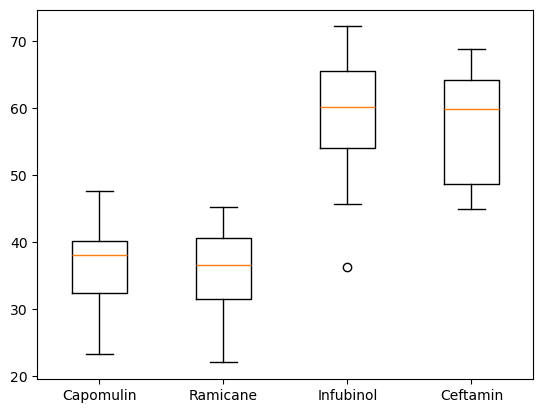

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_dict = {"Capomulin":tumor_vol_data[0], "Ramicane":tumor_vol_data[1], "Infubinol":tumor_vol_data[2], "Ceftamin":tumor_vol_data[3]}
fig, ax = plt.subplots()
ax.boxplot(plot_dict.values())
ax.set_xticklabels(plot_dict.keys())
plt.show()

## Line and Scatter Plots

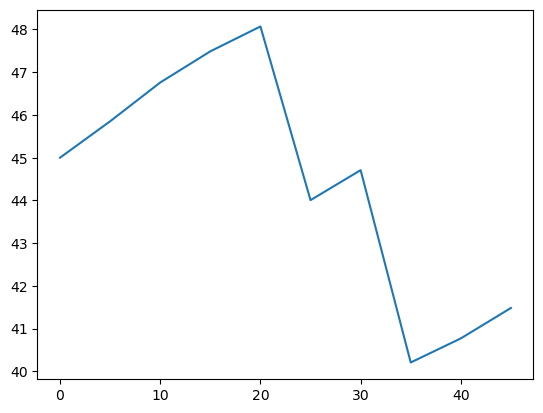

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = cleaned_mouse_study_data.loc[cleaned_mouse_study_data["Mouse ID"] == "l509"]
plt.plot(mouse_l509_data["Timepoint"],mouse_l509_data["Tumor Volume (mm3)"])
plt.show()

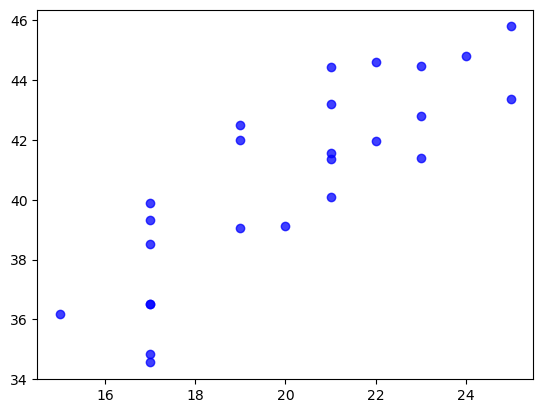

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data = cleaned_mouse_study_data.loc[cleaned_mouse_study_data["Drug Regimen"]=="Capomulin"]
Capomulin_data_plot = pd.merge(Capomulin_data.groupby(by = "Mouse ID")["Tumor Volume (mm3)"].mean(), Capomulin_data.groupby(by = "Mouse ID")["Weight (g)"].mean(), on = "Mouse ID", how = "inner")
plt.scatter(Capomulin_data_plot["Weight (g)"],Capomulin_data_plot["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="blue", alpha=0.75)
plt.show()

## Correlation and Regression

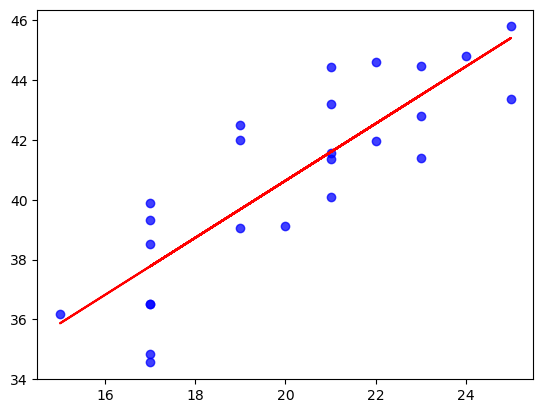

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_data_plot["Weight (g)"],Capomulin_data_plot["Tumor Volume (mm3)"])
lineregress = (Capomulin_data_plot["Weight (g)"]*slope + intercept)
plt.plot(Capomulin_data_plot["Weight (g)"], lineregress, color = "red")
Capomulin_data = cleaned_mouse_study_data.loc[cleaned_mouse_study_data["Drug Regimen"]=="Capomulin"]
Capomulin_data_plot = pd.merge(Capomulin_data.groupby(by = "Mouse ID")["Tumor Volume (mm3)"].mean(), Capomulin_data.groupby(by = "Mouse ID")["Weight (g)"].mean(), on = "Mouse ID", how = "inner")
plt.scatter(Capomulin_data_plot["Weight (g)"],Capomulin_data_plot["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="blue", alpha=0.75)
plt.show()